### Import Data and Libs

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import streamlit as st
#import seaborn as sns

In [8]:
df = pd.read_csv('supermarket_sales.csv')

In [9]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


### Explore Data

In [10]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [12]:
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [13]:
df.shape

(1000, 17)

In [14]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [15]:
df.nunique()

Invoice ID                 1000
Branch                        3
City                          3
Customer type                 2
Gender                        2
Product line                  6
Unit price                  943
Quantity                     10
Tax 5%                      990
Total                       990
Date                         89
Time                        506
Payment                       3
cogs                        990
gross margin percentage       1
gross income                990
Rating                       61
dtype: int64

In [16]:
df['Branch'].unique()

array(['A', 'C', 'B'], dtype=object)

### Find Relationship between Data

In [17]:
sales = df.iloc[:,[2,7,10,11]]

In [18]:
sale_by_city = sales.groupby('City').sum()
sale_by_city

,Quantity
City,
Mandalay,1820
Naypyitaw,1831
Yangon,1859


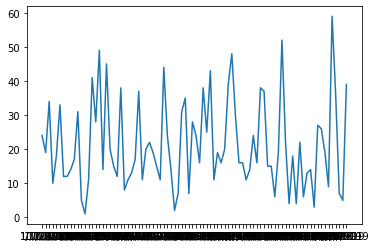

,Quantity
Date,
1/1/2019,20
1/10/2019,21
1/11/2019,9
1/12/2019,17
1/13/2019,15
...,...
3/5/2019,39
3/6/2019,1
3/7/2019,16


In [19]:
def timeline(city):
    per_city = sales[sales['City'] == city].sort_values(by='Date')
    per_city = per_city.groupby('Date').sum()
    return per_city

plt.plot(timeline("Mandalay"))
plt.show()

timeline("Mandalay")
timeline("Naypyitaw")

In [20]:
def time_slot(x):
    if (x > "08:00" and x < "10:00"):
        return "8-10"
    if (x >= "10:00" and x < "12:00"):
        return "10-12"
    if (x >= "12:00" and x < "14:00"):
        return "12-14"
    if (x >= "14:00" and x < "16:00"):
        return "14-16"
    if (x >= "16:00" and x < "18:00"):
        return "16-18"
    if (x >= "18:00" and x < "20:00"):
        return "18-20"
    if (x >= "20:00" and x < "22:00"):
        return "20-22"

df['Time Slot'] = df['Time'].apply(lambda x: time_slot(x))
yangon = sales[sales['City'] == 'Yangon'].groupby('Time Slot').sum()
yangon.plot(kind='bar')

KeyError: 'Time Slot'